In [1]:
import sys
sys.path.append('..')

In [2]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns

In [3]:
from core.getdata import *
from core.dataset import *
from core.dataset2 import * 
from core.network import *
from core.trainer import *
from core.visualization import *

In [4]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [5]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
size = 1288 # replicated

In [7]:
data1 = DatasetSplit(ligands, polarization, 1, size)
data2 = DatasetSplit(ligands, polarization, 2, size)

In [11]:
print(data1.data.shape, data2.data.shape)

(69552, 98, 1) (69552, 98, 1)


In [13]:
train1, test1, val1 = torch.utils.data.random_split(data1, [41732, 13910, 13910])
train2, test2, val2 = torch.utils.data.random_split(data2, [41732, 13910, 13910])

In [14]:
trainloader1 = torch.utils.data.DataLoader(train1, batch_size=64, shuffle=True)
testloader1 = torch.utils.data.DataLoader(test1, batch_size=64, shuffle=True)
valloader1 = torch.utils.data.DataLoader(val1, batch_size=64, shuffle=True)

trainloader2 = torch.utils.data.DataLoader(train2, batch_size=64, shuffle=True)
testloader2 = torch.utils.data.DataLoader(test2, batch_size=64, shuffle=True)
valloader2 = torch.utils.data.DataLoader(val2, batch_size=64, shuffle=True)

In [17]:
# hyperparameters
input_size = 1
hidden_size = 98
output_size = 9

lr = 0.001
epochs = 70
batch_size = 64

device = torch.device('cuda')

In [20]:
net = LSTM(input_size=input_size, hidden_sizes=hidden_size, output_size=output_size, num_layers=1, device=device)

In [21]:
net.train()

LSTM(
  (lstm): LSTM(1, 98, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [22]:
trainer = LSTMTrainer(model=net, device=device)

In [24]:
trainer.train(trainloader1, valloader1, batch_size=batch_size, n_epochs=epochs)

  1%|█▏                                                                                 | 1/70 [00:05<06:30,  5.65s/it]

Epoch 001: | Training Loss: 2.137444796459963 | Validation Loss: 2.168098649847398


  3%|██▎                                                                                | 2/70 [00:09<05:04,  4.47s/it]

Epoch 002: | Training Loss: 2.1590850079406456 | Validation Loss: 2.190386620136576


  4%|███▌                                                                               | 3/70 [00:12<04:33,  4.09s/it]

Epoch 003: | Training Loss: 2.180414212973158 | Validation Loss: 2.18227966116109


  6%|████▋                                                                              | 4/70 [00:16<04:17,  3.90s/it]

Epoch 004: | Training Loss: 2.149754463439696 | Validation Loss: 2.1075860086931


  7%|█████▉                                                                             | 5/70 [00:20<04:04,  3.75s/it]

Epoch 005: | Training Loss: 2.116754088248447 | Validation Loss: 2.103407927609365


  9%|███████                                                                            | 6/70 [00:23<03:54,  3.67s/it]

Epoch 006: | Training Loss: 2.170846912616245 | Validation Loss: 2.178437829017639


 10%|████████▎                                                                          | 7/70 [00:27<03:48,  3.62s/it]

Epoch 007: | Training Loss: 2.161646833828726 | Validation Loss: 2.1872306471570915


 11%|█████████▍                                                                         | 8/70 [00:30<03:41,  3.58s/it]

Epoch 008: | Training Loss: 2.1426571038013944 | Validation Loss: 2.128388804033262


 13%|██████████▋                                                                        | 9/70 [00:34<03:36,  3.55s/it]

Epoch 009: | Training Loss: 2.1016993173961436 | Validation Loss: 2.0999142013558556


 14%|███████████▋                                                                      | 10/70 [00:37<03:31,  3.52s/it]

Epoch 010: | Training Loss: 1.9815858620779438 | Validation Loss: 1.9274948933802614


 16%|████████████▉                                                                     | 11/70 [00:40<03:27,  3.51s/it]

Epoch 011: | Training Loss: 1.9105615772843179 | Validation Loss: 1.902728611176167


 17%|██████████████                                                                    | 12/70 [00:44<03:23,  3.50s/it]

Epoch 012: | Training Loss: 1.8404096863353783 | Validation Loss: 1.7857094631282562


 19%|███████████████▏                                                                  | 13/70 [00:47<03:19,  3.49s/it]

Epoch 013: | Training Loss: 1.8253783035059252 | Validation Loss: 1.77577518705928


 20%|████████████████▍                                                                 | 14/70 [00:51<03:15,  3.49s/it]

Epoch 014: | Training Loss: 1.738209199029125 | Validation Loss: 1.6554694427262753


 21%|█████████████████▌                                                                | 15/70 [00:54<03:12,  3.49s/it]

Epoch 015: | Training Loss: 1.6753832794623207 | Validation Loss: 1.8204521679003305


 23%|██████████████████▋                                                               | 16/70 [00:58<03:08,  3.49s/it]

Epoch 016: | Training Loss: 1.6940749587910464 | Validation Loss: 1.6594919491251674


 24%|███████████████████▉                                                              | 17/70 [01:01<03:04,  3.49s/it]

Epoch 017: | Training Loss: 1.623140729587257 | Validation Loss: 1.5746104804747696


 26%|█████████████████████                                                             | 18/70 [01:05<03:02,  3.51s/it]

Epoch 018: | Training Loss: 1.564843521548997 | Validation Loss: 1.55009683228414


 27%|██████████████████████▎                                                           | 19/70 [01:08<02:58,  3.51s/it]

Epoch 019: | Training Loss: 1.5317672240971423 | Validation Loss: 1.5195252818798801


 29%|███████████████████████▍                                                          | 20/70 [01:12<02:54,  3.50s/it]

Epoch 020: | Training Loss: 1.5066200500242926 | Validation Loss: 1.5050773019090704


 30%|████████████████████████▌                                                         | 21/70 [01:15<02:51,  3.50s/it]

Epoch 021: | Training Loss: 1.4884393405038037 | Validation Loss: 1.482725422316735


 31%|█████████████████████████▊                                                        | 22/70 [01:19<02:47,  3.49s/it]

Epoch 022: | Training Loss: 1.4673095240527236 | Validation Loss: 1.45096573260946


 33%|██████████████████████████▉                                                       | 23/70 [01:22<02:44,  3.50s/it]

Epoch 023: | Training Loss: 1.4492843198557177 | Validation Loss: 1.449348298234677


 34%|████████████████████████████                                                      | 24/70 [01:26<02:41,  3.51s/it]

Epoch 024: | Training Loss: 1.4359754504690125 | Validation Loss: 1.433490787624219


 36%|█████████████████████████████▎                                                    | 25/70 [01:29<02:37,  3.50s/it]

Epoch 025: | Training Loss: 1.4207647633589062 | Validation Loss: 1.407097895211036


 37%|██████████████████████████████▍                                                   | 26/70 [01:33<02:33,  3.49s/it]

Epoch 026: | Training Loss: 1.3991740279321832 | Validation Loss: 1.4201403889087363


 39%|███████████████████████████████▋                                                  | 27/70 [01:36<02:30,  3.50s/it]

Epoch 027: | Training Loss: 1.3888173503130903 | Validation Loss: 1.3978972549832196


 40%|████████████████████████████████▊                                                 | 28/70 [01:40<02:28,  3.53s/it]

Epoch 028: | Training Loss: 1.376391159721392 | Validation Loss: 1.394659393424288


 41%|█████████████████████████████████▉                                                | 29/70 [01:44<02:24,  3.54s/it]

Epoch 029: | Training Loss: 1.3603297102323535 | Validation Loss: 1.3916467034488642


 43%|███████████████████████████████████▏                                              | 30/70 [01:47<02:20,  3.52s/it]

Epoch 030: | Training Loss: 1.3503067665954462 | Validation Loss: 1.3534426544237574


 44%|████████████████████████████████████▎                                             | 31/70 [01:50<02:16,  3.50s/it]

Epoch 031: | Training Loss: 1.335279548241205 | Validation Loss: 1.364266674999797


 46%|█████████████████████████████████████▍                                            | 32/70 [01:54<02:12,  3.49s/it]

Epoch 032: | Training Loss: 1.3186377992491263 | Validation Loss: 1.344206864407303


 47%|██████████████████████████████████████▋                                           | 33/70 [01:57<02:08,  3.49s/it]

Epoch 033: | Training Loss: 1.3082068633248212 | Validation Loss: 1.3288488297834309


 49%|███████████████████████████████████████▊                                          | 34/70 [02:01<02:05,  3.49s/it]

Epoch 034: | Training Loss: 1.2951361361725588 | Validation Loss: 1.3193191779316018


 50%|█████████████████████████████████████████                                         | 35/70 [02:04<02:02,  3.49s/it]

Epoch 035: | Training Loss: 1.2811273521705207 | Validation Loss: 1.3166293496385626


 51%|██████████████████████████████████████████▏                                       | 36/70 [02:08<01:58,  3.49s/it]

Epoch 036: | Training Loss: 1.2776099508243168 | Validation Loss: 1.3423236146432544


 53%|███████████████████████████████████████████▎                                      | 37/70 [02:11<01:55,  3.49s/it]

Epoch 037: | Training Loss: 1.2580991432549942 | Validation Loss: 1.2862466858067643


 54%|████████████████████████████████████████████▌                                     | 38/70 [02:15<01:52,  3.52s/it]

Epoch 038: | Training Loss: 1.2500440256518939 | Validation Loss: 1.2856410408238752


 56%|█████████████████████████████████████████████▋                                    | 39/70 [02:19<01:50,  3.56s/it]

Epoch 039: | Training Loss: 1.2426897541122086 | Validation Loss: 1.2714506508013523


 57%|██████████████████████████████████████████████▊                                   | 40/70 [02:22<01:46,  3.54s/it]

Epoch 040: | Training Loss: 1.234358679919659 | Validation Loss: 1.3033762883155717


 59%|████████████████████████████████████████████████                                  | 41/70 [02:26<01:42,  3.53s/it]

Epoch 041: | Training Loss: 1.2189324882457668 | Validation Loss: 1.2753329082913356


 60%|█████████████████████████████████████████████████▏                                | 42/70 [02:29<01:38,  3.52s/it]

Epoch 042: | Training Loss: 1.2110062605754157 | Validation Loss: 1.271953279272132


 61%|██████████████████████████████████████████████████▎                               | 43/70 [02:33<01:34,  3.51s/it]

Epoch 043: | Training Loss: 1.1929323988157976 | Validation Loss: 1.2590032878818862


 63%|███████████████████████████████████████████████████▌                              | 44/70 [02:36<01:31,  3.52s/it]

Epoch 044: | Training Loss: 1.1968675468453587 | Validation Loss: 1.25511068406455


 64%|████████████████████████████████████████████████████▋                             | 45/70 [02:40<01:27,  3.51s/it]

Epoch 045: | Training Loss: 1.1837084637484179 | Validation Loss: 1.2515790066040984


 66%|█████████████████████████████████████████████████████▉                            | 46/70 [02:43<01:24,  3.51s/it]

Epoch 046: | Training Loss: 1.170256748316299 | Validation Loss: 1.252832974589199


 67%|███████████████████████████████████████████████████████                           | 47/70 [02:47<01:21,  3.53s/it]

Epoch 047: | Training Loss: 1.1644207051117972 | Validation Loss: 1.2309721355591345


 69%|████████████████████████████████████████████████████████▏                         | 48/70 [02:50<01:17,  3.51s/it]

Epoch 048: | Training Loss: 1.149696634702989 | Validation Loss: 1.2220506009158738


 70%|█████████████████████████████████████████████████████████▍                        | 49/70 [02:54<01:13,  3.51s/it]

Epoch 049: | Training Loss: 1.157230449398298 | Validation Loss: 1.2288237148468648


 71%|██████████████████████████████████████████████████████████▌                       | 50/70 [02:57<01:10,  3.51s/it]

Epoch 050: | Training Loss: 1.1352172424563223 | Validation Loss: 1.2490623276168054


 73%|███████████████████████████████████████████████████████████▋                      | 51/70 [03:01<01:06,  3.52s/it]

Epoch 051: | Training Loss: 1.13256685383287 | Validation Loss: 1.221080060125491


 74%|████████████████████████████████████████████████████████████▉                     | 52/70 [03:04<01:03,  3.52s/it]

Epoch 052: | Training Loss: 1.125839919810273 | Validation Loss: 1.243158789402848


 76%|██████████████████████████████████████████████████████████████                    | 53/70 [03:08<01:00,  3.53s/it]

Epoch 053: | Training Loss: 1.1261466046935018 | Validation Loss: 1.2068693440988523


 77%|███████████████████████████████████████████████████████████████▎                  | 54/70 [03:11<00:56,  3.55s/it]

Epoch 054: | Training Loss: 1.1109363356374125 | Validation Loss: 1.2229846685851387


 79%|████████████████████████████████████████████████████████████████▍                 | 55/70 [03:15<00:53,  3.56s/it]

Epoch 055: | Training Loss: 1.106863486821582 | Validation Loss: 1.1949701500595162


 80%|█████████████████████████████████████████████████████████████████▌                | 56/70 [03:19<00:49,  3.55s/it]

Epoch 056: | Training Loss: 1.1064192378867823 | Validation Loss: 1.1911269070905284


 81%|██████████████████████████████████████████████████████████████████▊               | 57/70 [03:22<00:46,  3.54s/it]

Epoch 057: | Training Loss: 1.0833870759419242 | Validation Loss: 1.2019695111917794


 83%|███████████████████████████████████████████████████████████████████▉              | 58/70 [03:26<00:42,  3.54s/it]

Epoch 058: | Training Loss: 1.0892695173917832 | Validation Loss: 1.1891959306843785


 84%|█████████████████████████████████████████████████████████████████████             | 59/70 [03:29<00:38,  3.53s/it]

Epoch 059: | Training Loss: 1.0786734115657544 | Validation Loss: 1.186959140891329


 86%|██████████████████████████████████████████████████████████████████████▎           | 60/70 [03:33<00:35,  3.53s/it]

Epoch 060: | Training Loss: 1.0656434317642842 | Validation Loss: 1.1982451283603632


 87%|███████████████████████████████████████████████████████████████████████▍          | 61/70 [03:36<00:31,  3.54s/it]

Epoch 061: | Training Loss: 1.0615781123933894 | Validation Loss: 1.2000198829064674


 89%|████████████████████████████████████████████████████████████████████████▋         | 62/70 [03:40<00:28,  3.54s/it]

Epoch 062: | Training Loss: 1.0765676645370938 | Validation Loss: 1.2028493126597972


 90%|█████████████████████████████████████████████████████████████████████████▊        | 63/70 [03:43<00:24,  3.54s/it]

Epoch 063: | Training Loss: 1.0386694220178525 | Validation Loss: 1.1752406219276814


 91%|██████████████████████████████████████████████████████████████████████████▉       | 64/70 [03:47<00:21,  3.53s/it]

Epoch 064: | Training Loss: 1.0376015402273964 | Validation Loss: 1.1891227498513843


 93%|████████████████████████████████████████████████████████████████████████████▏     | 65/70 [03:50<00:17,  3.54s/it]

Epoch 065: | Training Loss: 1.0419464837902355 | Validation Loss: 1.1994705085360675


 94%|█████████████████████████████████████████████████████████████████████████████▎    | 66/70 [03:54<00:14,  3.55s/it]

Epoch 066: | Training Loss: 1.0290272336276347 | Validation Loss: 1.1637062938935165


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 67/70 [03:57<00:10,  3.54s/it]

Epoch 067: | Training Loss: 1.0198943958165634 | Validation Loss: 1.1890016542662174


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 68/70 [04:01<00:07,  3.52s/it]

Epoch 068: | Training Loss: 1.0182772099880493 | Validation Loss: 1.1654155678158507


 99%|████████████████████████████████████████████████████████████████████████████████▊ | 69/70 [04:04<00:03,  3.51s/it]

Epoch 069: | Training Loss: 1.0182393617688423 | Validation Loss: 1.1624135921854493


100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [04:08<00:00,  3.55s/it]

Epoch 070: | Training Loss: 1.003979698987321 | Validation Loss: 1.1570077308821023


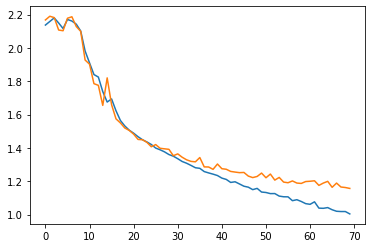

In [25]:
plt.plot(trainer.loss_history[0])
plt.plot(trainer.loss_history[1])

In [39]:
y_prob, y_pred, y_true = trainer.evaluate(testloader1)

In [45]:
# evaluated on test dataset from replica 1
cr = sklearn.metrics.classification_report(y_true, y_pred, target_names=ligands, output_dict=True)
cr_df = pd.DataFrame(cr).transpose()
print(cr_df)

              precision    recall  f1-score       support
TNF            0.655934  0.687624  0.671405   1511.000000
R84            0.714036  0.775459  0.743481   1581.000000
PIC            0.618193  0.649123  0.633281   1539.000000
P3K            0.607422  0.605058  0.606238   1542.000000
FLA            0.432990  0.426540  0.429741   1477.000000
CpG            0.426362  0.375730  0.399448   1541.000000
FSL            0.379556  0.279450  0.321900   1528.000000
LPS            0.495838  0.520274  0.507763   1603.000000
UST            0.835057  0.965995  0.895766   1588.000000
accuracy       0.589576  0.589576  0.589576      0.589576
macro avg      0.573932  0.587250  0.578780  13910.000000
weighted avg   0.575518  0.589576  0.580729  13910.000000


In [35]:
y_prob_cross, y_pred_cross, y_true_cross = trainer.evaluate(testloader2)

In [46]:
# evaluated on test dataset from replica 2
cr_cross = sklearn.metrics.classification_report(y_true_cross, y_pred_cross, target_names=ligands, output_dict=True)
cr_cross_df = pd.DataFrame(cr_cross).transpose()
print(cr_cross_df)

              precision    recall  f1-score       support
TNF            0.539653  0.546424  0.543017   1594.000000
R84            0.591837  0.635719  0.612993   1551.000000
PIC            0.369663  0.497634  0.424207   1479.000000
P3K            0.448191  0.353208  0.395071   1543.000000
FLA            0.297861  0.351912  0.322638   1543.000000
CpG            0.251389  0.231015  0.240772   1567.000000
FSL            0.231405  0.181700  0.203562   1541.000000
LPS            0.330997  0.401832  0.362991   1528.000000
UST            0.573516  0.401535  0.472358   1564.000000
accuracy       0.400072  0.400072  0.400072      0.400072
macro avg      0.403835  0.400109  0.397512  13910.000000
weighted avg   0.404694  0.400072  0.397955  13910.000000


In [52]:
cr_cross_df

,precision,recall,f1-score,support
TNF,0.539653,0.546424,0.543017,1594.000000
R84,0.591837,0.635719,0.612993,1551.000000
PIC,0.369663,0.497634,0.424207,1479.000000
P3K,0.448191,0.353208,0.395071,1543.000000
FLA,0.297861,0.351912,0.322638,1543.000000
CpG,0.251389,0.231015,0.240772,1567.000000
FSL,0.231405,0.181700,0.203562,1541.000000
LPS,0.330997,0.401832,0.362991,1528.000000
UST,0.573516,0.401535,0.472358,1564.000000
accuracy,0.400072,0.400072,0.400072,0.400072


In [58]:
net2 = LSTM(input_size=input_size, hidden_sizes=hidden_size, output_size=output_size, num_layers=1, device=device)

In [59]:
net2.train()

LSTM(
  (lstm): LSTM(1, 98, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [60]:
trainer2 = LSTMTrainer(model=net2, device=device)

In [61]:
trainer2.train(trainloader2, valloader2, batch_size=batch_size, n_epochs=epochs)

  1%|█▏                                                                                 | 1/70 [00:03<04:22,  3.81s/it]

Epoch 001: | Training Loss: 2.1527929156334076 | Validation Loss: 2.104259980381082


  3%|██▎                                                                                | 2/70 [00:07<04:12,  3.71s/it]

Epoch 002: | Training Loss: 2.174167239465173 | Validation Loss: 2.1784239318392693


  4%|███▌                                                                               | 3/70 [00:10<04:03,  3.63s/it]

Epoch 003: | Training Loss: 2.152417160102821 | Validation Loss: 2.105757011186092


  6%|████▋                                                                              | 4/70 [00:14<03:55,  3.57s/it]

Epoch 004: | Training Loss: 2.1865545469257768 | Validation Loss: 2.1835648532307474


  7%|█████▉                                                                             | 5/70 [00:17<03:51,  3.56s/it]

Epoch 005: | Training Loss: 2.1790797443886447 | Validation Loss: 2.15711948084175


  9%|███████                                                                            | 6/70 [00:21<03:46,  3.54s/it]

Epoch 006: | Training Loss: 2.1586049099611104 | Validation Loss: 2.1464731977620257


 10%|████████▎                                                                          | 7/70 [00:25<03:42,  3.54s/it]

Epoch 007: | Training Loss: 2.1736455706688385 | Validation Loss: 2.1915794851583077


 11%|█████████▍                                                                         | 8/70 [00:28<03:41,  3.58s/it]

Epoch 008: | Training Loss: 2.160012919723896 | Validation Loss: 2.087802609719268


 13%|██████████▋                                                                        | 9/70 [00:32<03:36,  3.55s/it]

Epoch 009: | Training Loss: 2.115905799507912 | Validation Loss: 2.161422294214231


 14%|███████████▋                                                                      | 10/70 [00:35<03:35,  3.59s/it]

Epoch 010: | Training Loss: 2.1228686877815868 | Validation Loss: 2.082486730103099


 16%|████████████▉                                                                     | 11/70 [00:39<03:32,  3.60s/it]

Epoch 011: | Training Loss: 2.050366312767426 | Validation Loss: 1.983254775541638


 17%|██████████████                                                                    | 12/70 [00:43<03:29,  3.61s/it]

Epoch 012: | Training Loss: 1.939983080576244 | Validation Loss: 1.9146364085171201


 19%|███████████████▏                                                                  | 13/70 [00:46<03:24,  3.59s/it]

Epoch 013: | Training Loss: 1.8571436974757662 | Validation Loss: 1.8146227702088313


 20%|████████████████▍                                                                 | 14/70 [00:50<03:20,  3.59s/it]

Epoch 014: | Training Loss: 1.7806059855962055 | Validation Loss: 1.7540596559507038


 21%|█████████████████▌                                                                | 15/70 [00:53<03:16,  3.58s/it]

Epoch 015: | Training Loss: 1.7525097421993705 | Validation Loss: 1.7020018581950336


 23%|██████████████████▋                                                               | 16/70 [00:57<03:13,  3.58s/it]

Epoch 016: | Training Loss: 1.689902428646 | Validation Loss: 1.680523595678697


 24%|███████████████████▉                                                              | 17/70 [01:00<03:09,  3.57s/it]

Epoch 017: | Training Loss: 1.6572846939151173 | Validation Loss: 1.6358447638126687


 26%|█████████████████████                                                             | 18/70 [01:04<03:04,  3.55s/it]

Epoch 018: | Training Loss: 1.6293399359511744 | Validation Loss: 1.627225110837079


 27%|██████████████████████▎                                                           | 19/70 [01:07<03:00,  3.55s/it]

Epoch 019: | Training Loss: 1.608590520176734 | Validation Loss: 1.591550152783


 29%|███████████████████████▍                                                          | 20/70 [01:11<02:56,  3.54s/it]

Epoch 020: | Training Loss: 1.587970157312215 | Validation Loss: 1.5914774274607317


 30%|████████████████████████▌                                                         | 21/70 [01:14<02:52,  3.53s/it]

Epoch 021: | Training Loss: 1.5630728811436372 | Validation Loss: 1.5753106710013993


 31%|█████████████████████████▊                                                        | 22/70 [01:18<02:48,  3.52s/it]

Epoch 022: | Training Loss: 1.543876789612938 | Validation Loss: 1.5421432655885678


 33%|██████████████████████████▉                                                       | 23/70 [01:22<02:45,  3.52s/it]

Epoch 023: | Training Loss: 1.5808874085705276 | Validation Loss: 1.5446315899901433


 34%|████████████████████████████                                                      | 24/70 [01:25<02:41,  3.52s/it]

Epoch 024: | Training Loss: 1.518998209039066 | Validation Loss: 1.567803191482474


 36%|█████████████████████████████▎                                                    | 25/70 [01:29<02:38,  3.51s/it]

Epoch 025: | Training Loss: 1.5079136968206666 | Validation Loss: 1.5176713247911646


 37%|██████████████████████████████▍                                                   | 26/70 [01:32<02:34,  3.52s/it]

Epoch 026: | Training Loss: 1.493729339076768 | Validation Loss: 1.5074631287417282


 39%|███████████████████████████████▋                                                  | 27/70 [01:36<02:31,  3.52s/it]

Epoch 027: | Training Loss: 1.4786635856350931 | Validation Loss: 1.4772797844825534


 40%|████████████████████████████████▊                                                 | 28/70 [01:39<02:27,  3.52s/it]

Epoch 028: | Training Loss: 1.4647804800803226 | Validation Loss: 1.4611152935465541


 41%|█████████████████████████████████▉                                                | 29/70 [01:43<02:24,  3.52s/it]

Epoch 029: | Training Loss: 1.4511815997761934 | Validation Loss: 1.4634069548834354


 43%|███████████████████████████████████▏                                              | 30/70 [01:46<02:21,  3.53s/it]

Epoch 030: | Training Loss: 1.437615850252908 | Validation Loss: 1.4475650842036676


 44%|████████████████████████████████████▎                                             | 31/70 [01:50<02:17,  3.54s/it]

Epoch 031: | Training Loss: 1.4227218008150915 | Validation Loss: 1.4475021334963107


 46%|█████████████████████████████████████▍                                            | 32/70 [01:53<02:14,  3.54s/it]

Epoch 032: | Training Loss: 1.40995585644592 | Validation Loss: 1.4256776199428314


 47%|██████████████████████████████████████▋                                           | 33/70 [01:57<02:10,  3.53s/it]

Epoch 033: | Training Loss: 1.3978153387766337 | Validation Loss: 1.40789128880982


 49%|███████████████████████████████████████▊                                          | 34/70 [02:00<02:08,  3.57s/it]

Epoch 034: | Training Loss: 1.3890510271738352 | Validation Loss: 1.4062112203431785


 50%|█████████████████████████████████████████                                         | 35/70 [02:04<02:06,  3.61s/it]

Epoch 035: | Training Loss: 1.3715213771801082 | Validation Loss: 1.3883101590182803


 51%|██████████████████████████████████████████▏                                       | 36/70 [02:08<02:02,  3.59s/it]

Epoch 036: | Training Loss: 1.3622188803612911 | Validation Loss: 1.3982259762396507


 53%|███████████████████████████████████████████▎                                      | 37/70 [02:11<01:58,  3.58s/it]

Epoch 037: | Training Loss: 1.3461189325699214 | Validation Loss: 1.3797729824661116


 54%|████████████████████████████████████████████▌                                     | 38/70 [02:15<01:54,  3.58s/it]

Epoch 038: | Training Loss: 1.3450904394547023 | Validation Loss: 1.3760223159002603


 56%|█████████████████████████████████████████████▋                                    | 39/70 [02:18<01:50,  3.57s/it]

Epoch 039: | Training Loss: 1.346922106892555 | Validation Loss: 1.3566350510360998


 57%|██████████████████████████████████████████████▊                                   | 40/70 [02:22<01:46,  3.55s/it]

Epoch 040: | Training Loss: 1.3198843467838002 | Validation Loss: 1.343931717063309


 59%|████████████████████████████████████████████████                                  | 41/70 [02:25<01:42,  3.55s/it]

Epoch 041: | Training Loss: 1.3152290796247776 | Validation Loss: 1.355860588747427


 60%|█████████████████████████████████████████████████▏                                | 42/70 [02:29<01:39,  3.55s/it]

Epoch 042: | Training Loss: 1.30279843621013 | Validation Loss: 1.333307083593596


 61%|██████████████████████████████████████████████████▎                               | 43/70 [02:33<01:35,  3.55s/it]

Epoch 043: | Training Loss: 1.29424057382902 | Validation Loss: 1.3730650396522033


 63%|███████████████████████████████████████████████████▌                              | 44/70 [02:36<01:32,  3.55s/it]

Epoch 044: | Training Loss: 1.3075202489885036 | Validation Loss: 1.3322138127383836


 64%|████████████████████████████████████████████████████▋                             | 45/70 [02:40<01:28,  3.55s/it]

Epoch 045: | Training Loss: 1.2779663050886683 | Validation Loss: 1.3458799183915515


 66%|█████████████████████████████████████████████████████▉                            | 46/70 [02:43<01:25,  3.55s/it]

Epoch 046: | Training Loss: 1.2711059319662645 | Validation Loss: 1.3094771496199686


 67%|███████████████████████████████████████████████████████                           | 47/70 [02:47<01:22,  3.57s/it]

Epoch 047: | Training Loss: 1.2652404290063457 | Validation Loss: 1.318092498484008


 69%|████████████████████████████████████████████████████████▏                         | 48/70 [02:50<01:18,  3.56s/it]

Epoch 048: | Training Loss: 1.2511062774504855 | Validation Loss: 1.3038923330263261


 70%|█████████████████████████████████████████████████████████▍                        | 49/70 [02:54<01:14,  3.55s/it]

Epoch 049: | Training Loss: 1.2463021992176635 | Validation Loss: 1.3029038375670756


 71%|██████████████████████████████████████████████████████████▌                       | 50/70 [02:57<01:11,  3.57s/it]

Epoch 050: | Training Loss: 1.2415379334189809 | Validation Loss: 1.2887379540762771


 73%|███████████████████████████████████████████████████████████▋                      | 51/70 [03:01<01:08,  3.59s/it]

Epoch 051: | Training Loss: 1.2230146357512948 | Validation Loss: 1.2907866277825941


 74%|████████████████████████████████████████████████████████████▉                     | 52/70 [03:05<01:04,  3.58s/it]

Epoch 052: | Training Loss: 1.2218827323197954 | Validation Loss: 1.2888496649374657


 76%|██████████████████████████████████████████████████████████████                    | 53/70 [03:08<01:00,  3.59s/it]

Epoch 053: | Training Loss: 1.2214552619555825 | Validation Loss: 1.2929179846146786


 77%|███████████████████████████████████████████████████████████████▎                  | 54/70 [03:12<00:56,  3.56s/it]

Epoch 054: | Training Loss: 1.22039406441985 | Validation Loss: 1.2764016980424933


 79%|████████████████████████████████████████████████████████████████▍                 | 55/70 [03:15<00:53,  3.53s/it]

Epoch 055: | Training Loss: 1.2242167205029206 | Validation Loss: 1.273356617864119


 80%|█████████████████████████████████████████████████████████████████▌                | 56/70 [03:19<00:49,  3.52s/it]

Epoch 056: | Training Loss: 1.191629742316411 | Validation Loss: 1.2842804961795107


 81%|██████████████████████████████████████████████████████████████████▊               | 57/70 [03:22<00:45,  3.53s/it]

Epoch 057: | Training Loss: 1.1818220241146467 | Validation Loss: 1.2846357461509355


 83%|███████████████████████████████████████████████████████████████████▉              | 58/70 [03:26<00:42,  3.54s/it]

Epoch 058: | Training Loss: 1.1936856463528702 | Validation Loss: 1.2801279466633404


 84%|█████████████████████████████████████████████████████████████████████             | 59/70 [03:29<00:39,  3.55s/it]

Epoch 059: | Training Loss: 1.196286664348649 | Validation Loss: 1.3244877233417756


 86%|██████████████████████████████████████████████████████████████████████▎           | 60/70 [03:33<00:35,  3.60s/it]

Epoch 060: | Training Loss: 1.1939948859295106 | Validation Loss: 1.2654874417759956


 87%|███████████████████████████████████████████████████████████████████████▍          | 61/70 [03:37<00:32,  3.61s/it]

Epoch 061: | Training Loss: 1.164240432004651 | Validation Loss: 1.2702399916058287


 89%|████████████████████████████████████████████████████████████████████████▋         | 62/70 [03:40<00:28,  3.58s/it]

Epoch 062: | Training Loss: 1.1547102606862465 | Validation Loss: 1.2433034239012166


 90%|█████████████████████████████████████████████████████████████████████████▊        | 63/70 [03:44<00:25,  3.58s/it]

Epoch 063: | Training Loss: 1.1528635554437798 | Validation Loss: 1.258305527474902


 91%|██████████████████████████████████████████████████████████████████████████▉       | 64/70 [03:47<00:21,  3.57s/it]

Epoch 064: | Training Loss: 1.1740040236921443 | Validation Loss: 1.26559207636282


 93%|████████████████████████████████████████████████████████████████████████████▏     | 65/70 [03:51<00:17,  3.57s/it]

Epoch 065: | Training Loss: 1.1529348932583152 | Validation Loss: 1.24122487049584


 94%|█████████████████████████████████████████████████████████████████████████████▎    | 66/70 [03:55<00:14,  3.56s/it]

Epoch 066: | Training Loss: 1.1297696921945897 | Validation Loss: 1.2281531721626946


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 67/70 [03:58<00:10,  3.56s/it]

Epoch 067: | Training Loss: 1.125589937838807 | Validation Loss: 1.2271313861422581


 97%|███████████████████████████████████████████████████████████████████████████████▋  | 68/70 [04:02<00:07,  3.55s/it]

Epoch 068: | Training Loss: 1.1294728543090236 | Validation Loss: 1.2299537541122612


 99%|████████████████████████████████████████████████████████████████████████████████▊ | 69/70 [04:05<00:03,  3.56s/it]

Epoch 069: | Training Loss: 1.1174909460599354 | Validation Loss: 1.2330991737886305


100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [04:09<00:00,  3.56s/it]

Epoch 070: | Training Loss: 1.1038978198859812 | Validation Loss: 1.2575551224957913


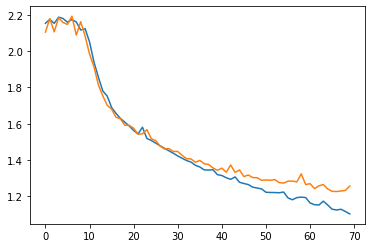

In [62]:
plt.plot(trainer2.loss_history[0])
plt.plot(trainer2.loss_history[1])

In [63]:
y_prob2, y_pred2, y_true2 = trainer2.evaluate(testloader2)

In [64]:
cr2 = sklearn.metrics.classification_report(y_true2, y_pred2, target_names=ligands, output_dict=True)
cr2_df = pd.DataFrame(cr2).transpose()
print(cr2_df)

              precision    recall  f1-score       support
TNF            0.621136  0.542033  0.578894   1594.000000
R84            0.626168  0.777563  0.693701   1551.000000
PIC            0.517966  0.633536  0.569951   1479.000000
P3K            0.543437  0.555412  0.549359   1543.000000
FLA            0.426197  0.415424  0.420742   1543.000000
CpG            0.473312  0.384812  0.424498   1567.000000
FSL            0.349558  0.205062  0.258487   1541.000000
LPS            0.434373  0.482984  0.457391   1528.000000
UST            0.847207  0.989130  0.912684   1564.000000
accuracy       0.554206  0.554206  0.554206      0.554206
macro avg      0.537706  0.553995  0.540634  13910.000000
weighted avg   0.538648  0.554206  0.541219  13910.000000


In [65]:
y_prob2_cross, y_pred2_cross, y_true2_cross = trainer2.evaluate(testloader1)

In [66]:
cr2_cross = sklearn.metrics.classification_report(y_true2_cross, y_pred2_cross, target_names=ligands, output_dict=True)
cr2_df_cross = pd.DataFrame(cr2_cross).transpose()
print(cr2_df_cross)

              precision    recall  f1-score       support
TNF            0.516470  0.549967  0.532692   1511.000000
R84            0.583494  0.764706  0.661922   1581.000000
PIC            0.360131  0.570500  0.441539   1539.000000
P3K            0.438770  0.518158  0.475171   1542.000000
FLA            0.334294  0.314150  0.323909   1477.000000
CpG            0.255556  0.194030  0.220583   1541.000000
FSL            0.237991  0.142670  0.178396   1528.000000
LPS            0.347826  0.379289  0.362877   1603.000000
UST            0.540107  0.254408  0.345890   1588.000000
accuracy       0.410496  0.410496  0.410496      0.410496
macro avg      0.401627  0.409764  0.393664  13910.000000
weighted avg   0.402601  0.410496  0.394358  13910.000000


In [67]:
# maybe some more plots here